Import Necessary Packages and Classes from Other Files 

In [2]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from Channel import Channel
from beam_gen import BeamGen
from simulation import Simulation 

wavelength = 810E-6
PI = np.pi
wavevector = (2.0*PI)/wavelength

graph_radius = 30
precision = 400

x = np.linspace(-graph_radius,graph_radius,precision+1); ## Grid points along x
y = np.linspace(-graph_radius,graph_radius,precision+1) ## Grid points along y
X,Y = np.meshgrid(x,y)
r = np.sqrt(X**2+Y**2)
phi = np.mod(np.arctan2(Y,X),2*PI)

beamWaist = 2  # Define beam waist of 2 mm
R = 20 #define radius of aperture to be 20 mm
pixel_spacing = 0.5

sim = Simulation(L=30*2, N=200, wavelength=810E-6, units="mm")
dimension = BeamGen("pixel",0,0,beamWaist,r,phi,0.000001,wavevector, pixel_spacing=pixel_spacing, R=R).dimension

print(dimension)

61


In [3]:

for i in range (dimension):
    sim.add_beam_gen(mode="pixel", s=i, R=R, beam_waist=beamWaist, pixel_spacing=pixel_spacing)



5.177267392575402e-08


IndexError: list index out of range

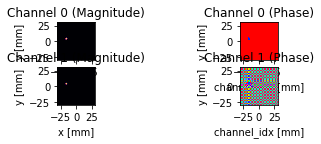

In [8]:
sim.add_channel(type=Channel.FREE_SPACE, dist=100E3)
#sim.add_channel(type = Channel.ABBARATION, n = [3, 1, 4], m = [1, 1, 2], stre = np.array([0.9, 0.9, 0.9]), app = 3*beamWaist)
#sim.add_channel(type = Channel.FREE_SPACE, dist = 10E3) 


sim.run(use_mub=True)

channel_idx = 0
print(sim.compute_qber(channel_index=channel_idx))
sim.plot_beams(run_index=1)
#sim.plot_detection_matrix(channel_idx, separate_mub=True)